In [1]:
election <- read.csv("Rdata/election_2022.csv")
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


---
## 20대 대선 권역별 후보 득표율을 꺽은선 그래프로 표현하시요.

수도권:<br>
('서울특별시','인천광역시','경기도')<br><br>
강원도:<br>
'강원도'<br><br>
영남:<br>
('경상북도','경상남도','대구광역시','부산광역시','울산광역시')<br><br>
충청:<br>
('충청북도','충청남도','세종특별자치시','대전광역시')<br><br>
호남:<br>
('전라남도','전라북도','제주특별자치도','광주광역시')<br><br>
수도권 <- c('서울특별시','인천광역시','경기도')<br>
강원권 <- '강원도'<br>
영남권 <- c('경상북도','경상남도','대구광역시','부산광역시','울산광역시')<br>
충청권 <- c('충청북도','충청남도','세종특별자치시','대전광역시')<br>
호남권 <- c('전라남도','전라북도','제주특별자치도','광주광역시')<br>

- 제목 : 20대 대선 권역별 후보 득표율

# 3조 권역별 후보 득표율

In [2]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
수도권 <-c('서울특별시','인천광역시','경기도')
강원권 <-'강원도'
영남권 <- c('경상북도','경상남도','대구광역시','부산광역시','울산광역시')
충청권 <- c('충청북도','충청남도','세종특별자치시','대전광역시')
호남권 <- c('전라남도','전라북도','제주특별자치도','광주광역시')

#ifelse문 사용시 %in% 백터통째로 비교할때 사용.
election$지역 <- ifelse(election$광역시도 %in% 수도권,'수도권',
               ifelse(election$광역시도 %in% 강원권,'강원권',
                     ifelse(election$광역시도 %in% 영남권,'영남권',
                           ifelse(election$광역시도 %in% 충청권,'충청권','호남권'))))
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,지역
서울특별시,종로구,129968,100629,46130,49172,3115,수도권
서울특별시,중구,111448,84998,38244,42906,2310,수도권
서울특별시,용산구,199077,152068,60063,85047,4374,수도권
서울특별시,성동구,252087,197240,84411,103880,5365,수도권
서울특별시,광진구,303582,235471,109922,113733,7072,수도권
서울특별시,동대문구,300928,232106,108171,112890,6416,수도권


In [4]:
# aggregate에서 cbind사용
elec1 <- aggregate(cbind(선거인수,투표수,이재명,윤석열,심상정)~지역,election,sum)
elec1

지역,선거인수,투표수,이재명,윤석열,심상정
강원권,1333621,1015458,419644,544980,25031
수도권,21971908,16904189,8156232,7993973,433289
영남권,10993369,8468363,2686576,5382549,185678
충청권,4602633,3464133,1573443,1719055,89261
호남권,4887963,3912521,3154923,619883,64193


In [5]:
elec1$ratio <- round(elec1$투표수/elec1$선거인수*100,2)
elec1$이ratio <- round(elec1$이재명/elec1$투표수*100,2)
elec1$윤ratio <- round(elec1$윤석열/elec1$투표수*100,2)
elec1$심ratio <- round(elec1$심상정/elec1$투표수*100,2)
arrange(elec1,desc(ratio))

지역,선거인수,투표수,이재명,윤석열,심상정,ratio,이ratio,윤ratio,심ratio
호남권,4887963,3912521,3154923,619883,64193,80.04,80.64,15.84,1.64
영남권,10993369,8468363,2686576,5382549,185678,77.03,31.72,63.56,2.19
수도권,21971908,16904189,8156232,7993973,433289,76.94,48.25,47.29,2.56
강원권,1333621,1015458,419644,544980,25031,76.14,41.33,53.67,2.46
충청권,4602633,3464133,1573443,1719055,89261,75.26,45.42,49.62,2.58


In [6]:
elec2 <- t(arrange(elec1,desc(ratio))[1:5,7:10])
colnames(elec2)=c('호남권','영남권','수도권','강원권','충청권')
elec2

,호남권,영남권,수도권,강원권,충청권
ratio,80.04,77.03,76.94,76.14,75.26
이ratio,80.64,31.72,48.25,41.33,45.42
윤ratio,15.84,63.56,47.29,53.67,49.62
심ratio,1.64,2.19,2.56,2.46,2.58


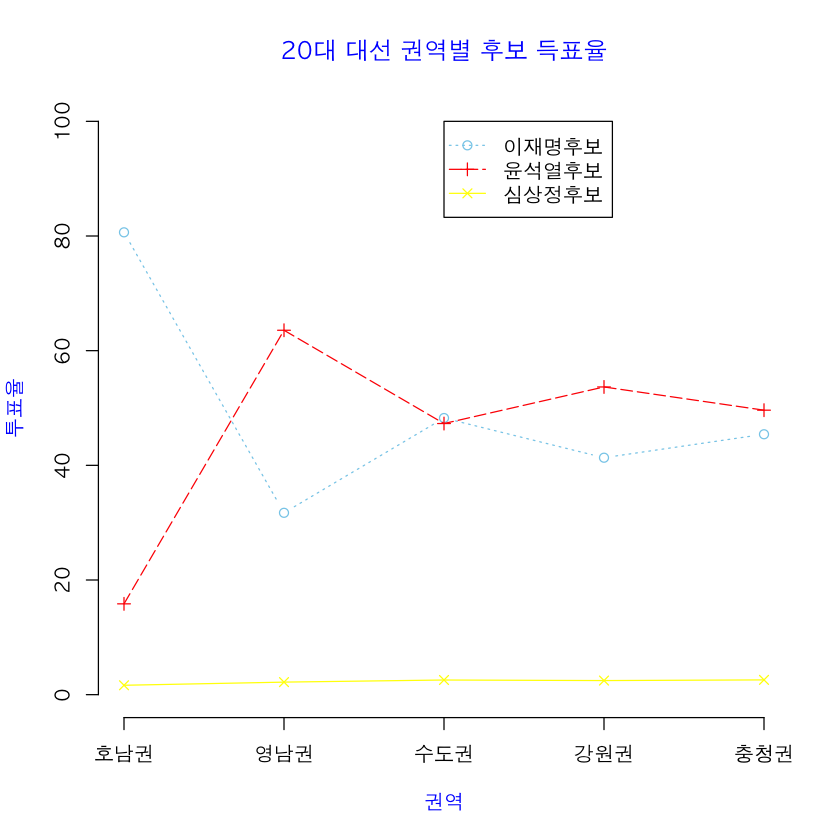

In [7]:
par(family="AppleGothic")
options(warn = -1)

이 <- elec2[2,]
윤 <- elec2[3,]
심 <- elec2[4,]


plot(이,
     type ="b",
     ylim=c(0,100),
     axes=F,
     ann=F,
     col="sky blue",
     lty=3
    )
legend(3,100,
      c("이재명후보","윤석열후보","심상정후보"),
      col=c("sky blue","red","yellow"),
      pch=c(21,3,4),
      lty=c(3,5,1)
      )
title(main="20대 대선 권역별 후보 득표율", col.main="blue")
title(xlab="권역", col.lab="blue")
title(ylab="투표율", col.lab="blue")
axis(1,at=1:5,lab=c('호남권','영남권','수도권','강원권','충청권'))
axis(2,ylim=c(0,100))
lines(윤,
      type="o",
      pch=3,
      col="red",
      lty=5
     )
lines(심,
      type="o",
      pch=4,
      col="yellow",
      lty=1
     )

## 2조 75% 이상의 투표율을 보이는 시군구 중 각 광역시도별로  이재명,윤석열 후보가 각각 50%이상의 득표율을 보인 시군구들의 개수를 꺽은선 그래프로 나타내고(파랑,빨강)
## 투표율 75%이상인 시군구 개수를 검은 점선으로 나타내세요

In [8]:
#library(plotrix)
library(dplyr)

In [9]:
options(warn = -1)
ratio <-
#data.frame 설정할때 컬럼넣는부분에서 통째로 계산할수 있따.!
data.frame(광역시도=election$광역시도,시군구=election$시군구,투표율=election$투표수/election$선거인수*100,
이재명=election$이재명/election$투표수*100,
윤석열=election$윤석열/election$투표수*100,
심상정=election$심상정/election$투표수*100)
ratio <-arrange(ratio,desc(투표율))
head(ratio)

광역시도,시군구,투표율,이재명,윤석열,심상정
경기도,과천시,84.88902,38.88253,57.08012,2.424623
전라남도,구례군,84.02284,84.34560,12.29354,1.212628
전라북도,장수군,83.78504,83.57363,12.71103,1.367837
경상북도,군위군,83.72659,13.76720,82.41680,1.184275
전라북도,진안군,83.54750,82.93291,13.64094,1.400159
전라북도,순창군,83.36059,85.41677,11.12229,1.157000


In [10]:
#지역별 75넘는곳
지역75<- subset(ratio,투표율>=75)
head(지역75)

광역시도,시군구,투표율,이재명,윤석열,심상정
경기도,과천시,84.88902,38.88253,57.08012,2.424623
전라남도,구례군,84.02284,84.34560,12.29354,1.212628
전라북도,장수군,83.78504,83.57363,12.71103,1.367837
경상북도,군위군,83.72659,13.76720,82.41680,1.184275
전라북도,진안군,83.54750,82.93291,13.64094,1.400159
전라북도,순창군,83.36059,85.41677,11.12229,1.157000


In [11]:
#이재명 50 넘는곳
이재명50<- subset(ratio,투표율>=75&이재명>50)
이재명50

,광역시도,시군구,투표율,이재명,윤석열,심상정
2,전라남도,구례군,84.02284,84.34560,12.293540,1.2126281
3,전라북도,장수군,83.78504,83.57363,12.711029,1.3678373
5,전라북도,진안군,83.54750,82.93291,13.640944,1.4001591
6,전라북도,순창군,83.36059,85.41677,11.122290,1.1569998
7,전라남도,담양군,83.05434,86.84454,9.918572,1.1434511
8,전라남도,신안군,83.05046,87.57403,9.386232,0.9310923
9,전라북도,임실군,82.92814,84.40943,12.045670,1.2614050
12,전라남도,장흥군,82.68525,87.12289,9.446170,1.1128364
14,전라남도,완도군,82.54028,87.99433,8.739377,0.9830028
15,전라남도,강진군,82.45243,84.39103,12.059295,1.1939103


In [12]:
#윤석열 50 넘는곳
윤석열50 <- subset(ratio,투표율>=75&윤석열>50)
head(윤석열50)

,광역시도,시군구,투표율,이재명,윤석열,심상정
1,경기도,과천시,84.88902,38.88253,57.08012,2.424623
4,경상북도,군위군,83.72659,13.76720,82.41680,1.184275
10,경기도,성남시분당구,82.92702,42.02496,54.58421,2.088339
11,경상북도,의성군,82.84954,16.38680,79.43942,1.388712
13,경상북도,영양군,82.62122,23.14177,72.69190,1.685985
16,경상북도,청송군,82.43320,19.77753,75.93805,1.586034


In [13]:
# merge 사용
#all.x=T  --> 각각의 데이터 프레임에서 없는값은 NA로 표시한뒤 전부다 병합해서 출력
#all.x=F --> 각각의 데이터 프레임에서 공통값으로 있는부분만 병합해서 출력
# count 값!
merge1 <-merge(x=count(지역75,광역시도),y=count(이재명50,광역시도),by.x='광역시도',by.y='광역시도',all.x=T)
merge1

광역시도,n.x,n.y
강원도,14,NA
경기도,26,12
경상남도,18,NA
경상북도,22,NA
광주광역시,5,5
대구광역시,8,NA
대전광역시,4,NA
부산광역시,8,NA
서울특별시,24,2
세종특별자치시,1,1


In [14]:
merge2<-merge(x=merge1,y=count(윤석열50,광역시도),by.x='광역시도',by.y='광역시도',all.x=T)
merge2

광역시도,n.x,n.y,n
강원도,14,NA,14
경기도,26,12,6
경상남도,18,NA,18
경상북도,22,NA,22
광주광역시,5,5,NA
대구광역시,8,NA,8
대전광역시,4,NA,1
부산광역시,8,NA,8
서울특별시,24,2,8
세종특별자치시,1,1,NA


In [15]:
colnames(merge2) <- c('광역시도','지역별75','이재명50','윤석열50')
# str 안쓰고 TRUE,FALSE값으로 바꿨네 이건 문자 자체로 1,0 이니까!
merge2[is.na(merge2)] <-0
merge2

광역시도,지역별75,이재명50,윤석열50
강원도,14,0,14
경기도,26,12,6
경상남도,18,0,18
경상북도,22,0,22
광주광역시,5,5,0
대구광역시,8,0,8
대전광역시,4,0,1
부산광역시,8,0,8
서울특별시,24,2,8
세종특별자치시,1,1,0


In [16]:
# 마지막에 메트릭스로 변환!
team<- t(as.matrix(merge2[,2:4]))
team

지역별75,14,26,18,22,5,8,4,8,24,1,5,4,22,15,8,8
이재명50,0,12,0,0,5,0,0,0,2,1,0,0,22,15,0,0
윤석열50,14,6,18,22,0,8,1,8,8,0,3,3,0,0,8,7


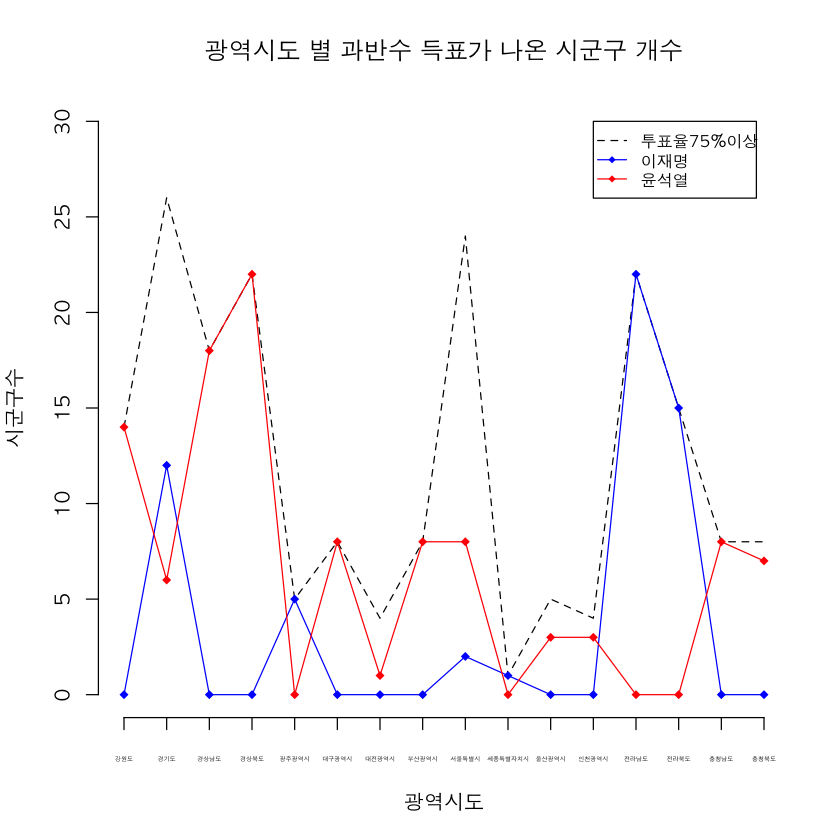

In [17]:
par(family ="AppleGothic", bg='white')
options(warn = -1)
plot(team[1,],
    type='l',
     ylim=c(0,30),
     col='black',
     axes =F, #x,y 좌표 frame 제거
     ann=F, #x,y label 제거
     lty = 2,

    )
# x축과 x축의 라벨을 설정
axis(1, at=1:16, lab=merge2$광역시도,cex.axis=0.3)
# y축과 y축의 라벨을 설정
axis(2, ylim=c(0,30))
# main title 지정
title(main="광역시도 별 과반수 득표가 나온 시군구 개수",col.main="black")

# x축 title(label) 지정
title(xlab="광역시도", col.lab="black")

# y축 title(label) 지정
title(ylab="시군구수", col.lab="black")
lines(team[2,],
      type='o',
       pch=18,
      lty=1,
     col="blue")

lines(team[3,],
      type='o',
       pch=18,
      lty=1,
     col="red")
# 범례
legend(12,30, #x,y 좌표값 (왼쪽위에 해당하는점)
      c("투표율75%이상","이재명","윤석열"),
      col=c("black","blue","red"),
      pch=c(NA,18,18),
      lty=c(2,1,1),
      cex=0.8  #기본 값이 1 
       
      )


 # 1조 각시군구별 실제 투표율과 가장 유사한 지역 Top5를 뽑아 오차의 합을 막대 그래프로 그려라
- 각 후보별 변동 없음
- 각 후보별 오차의 합이 최소인 지역 순서대로
- 실제 득표율 : 이재명 47.83, 윤석열 48.56, 심상정 2.37

In [18]:
head(election)
library(dplyr)
#library(plotrix)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,지역
서울특별시,종로구,129968,100629,46130,49172,3115,수도권
서울특별시,중구,111448,84998,38244,42906,2310,수도권
서울특별시,용산구,199077,152068,60063,85047,4374,수도권
서울특별시,성동구,252087,197240,84411,103880,5365,수도권
서울특별시,광진구,303582,235471,109922,113733,7072,수도권
서울특별시,동대문구,300928,232106,108171,112890,6416,수도권


In [19]:
vote.전체투표율 <- c(47.83, 48.56,2.37 )
vote.투표율 <- election[,5:7]/ election[,4] * 100
vote.투표율  <- cbind(시군구=election$시군구, vote.투표율 )
head(vote.투표율)

시군구,이재명,윤석열,심상정
종로구,45.84166,48.86464,3.095529
중구,44.99400,50.47883,2.717711
용산구,39.49746,55.92695,2.876345
성동구,42.79609,52.66680,2.720037
광진구,46.68176,48.30022,3.003342
동대문구,46.60414,48.63726,2.764254


In [20]:
#오차면 -도 나오니까 abs로 절대값 만들어주기!
vote.투표율  <- vote.투표율 [((abs(vote.투표율 [,2]- vote.전체투표율[1]) < 1) 
                & (abs(vote.투표율 [,3]-vote.전체투표율[2]) < 1) 
                & (abs(vote.투표율 [,4]-vote.전체투표율[3]) < 1) 
                & (vote.투표율 [,2] < vote.투표율 [,3])),]
head(vote.투표율)

,시군구,이재명,윤석열,심상정
51,동구,46.91089,48.04976,2.922919
52,미추홀구,47.08443,47.80874,2.743668
68,유성구,47.05121,48.19437,2.810061
69,대덕구,46.89525,47.79644,2.721743
137,청주시흥덕구,47.00549,47.62376,2.914169


In [21]:
vote.투표율$투표율오차 <- (abs(vote.투표율[,2] - vote.전체투표율[1]) 
                   + abs(vote.투표율 [,3] - vote.전체투표율[2]) 
                   + abs(vote.투표율 [,4] - vote.전체투표율[3]))
                         
vote.투표율  <- arrange(vote.투표율 ,투표율오차)
head(vote.투표율)

시군구,이재명,윤석열,심상정,투표율오차
유성구,47.05121,48.19437,2.810061,1.584484
미추홀구,47.08443,47.80874,2.743668,1.870498
동구,46.91089,48.04976,2.922919,1.982266
대덕구,46.89525,47.79644,2.721743,2.050051
청주시흥덕구,47.00549,47.62376,2.914169,2.304917


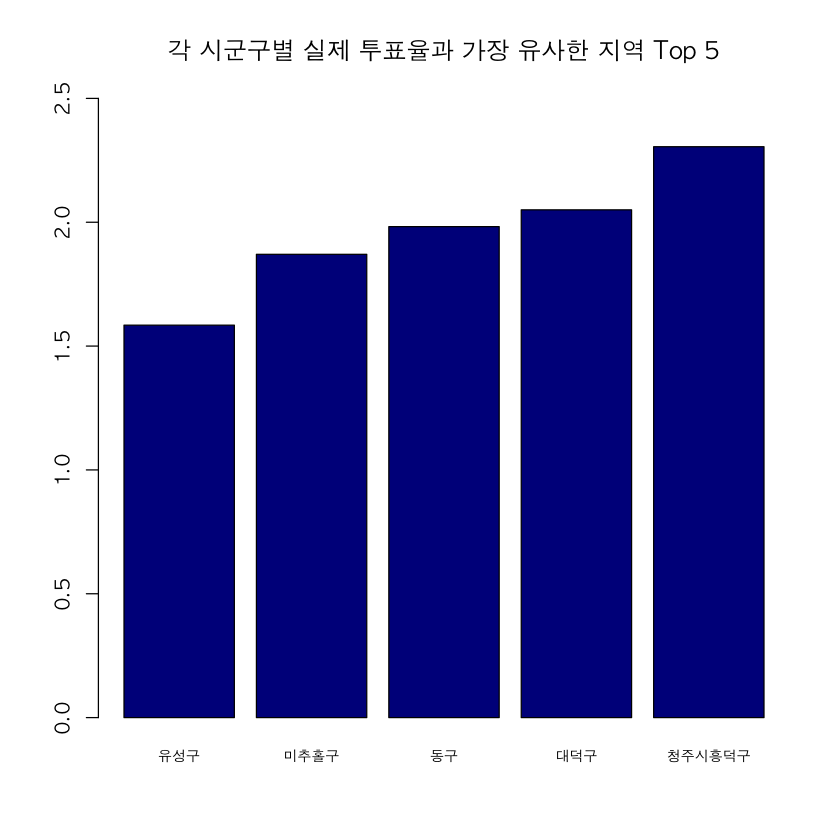

In [22]:
par(family = "AppleGothic")
options(warn = -1)
barplot(vote.투표율$투표율오차,
        main = "각 시군구별 실제 투표율과 가장 유사한 지역 Top 5",
        ylim = c(0,2.5),
        col = "darkblue",
        names = vote.투표율$시군구,
        cex.names = 0.7
       )

## 4조

In [23]:
election$기타 <- election[,4]-apply(election[,5:7],1,sum)
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,지역,기타
서울특별시,종로구,129968,100629,46130,49172,3115,수도권,2212
서울특별시,중구,111448,84998,38244,42906,2310,수도권,1538
서울특별시,용산구,199077,152068,60063,85047,4374,수도권,2584
서울특별시,성동구,252087,197240,84411,103880,5365,수도권,3584
서울특별시,광진구,303582,235471,109922,113733,7072,수도권,4744
서울특별시,동대문구,300928,232106,108171,112890,6416,수도권,4629


In [24]:
광역시도별 <- aggregate(cbind(선거인수,투표수,이재명,윤석열,심상정,기타)~광역시도,election,sum)
head(광역시도별)

광역시도,선거인수,투표수,이재명,윤석열,심상정,기타
강원도,1333621,1015458,419644,544980,25031,25803
경기도,11106036,8518854,4297931,3859666,201113,160144
경상남도,2809907,2146882,794130,1237346,52591,62815
경상북도,2273028,1774284,418371,1278922,33123,43868
광주광역시,1209206,985492,830058,124511,14865,16058
대구광역시,2046714,1611512,345045,1199888,31131,35448


In [25]:
광역시도별$투표율 <- (광역시도별$투표수/광역시도별$선거인수)*100
head(광역시도별)

광역시도,선거인수,투표수,이재명,윤석열,심상정,기타,투표율
강원도,1333621,1015458,419644,544980,25031,25803,76.14292
경기도,11106036,8518854,4297931,3859666,201113,160144,76.70472
경상남도,2809907,2146882,794130,1237346,52591,62815,76.40402
경상북도,2273028,1774284,418371,1278922,33123,43868,78.05817
광주광역시,1209206,985492,830058,124511,14865,16058,81.49910
대구광역시,2046714,1611512,345045,1199888,31131,35448,78.73655


In [26]:
광역시도별 <- arrange(광역시도별,desc(투표율))[c(1,length(광역시도별[,1])),]
광역시도별

,광역시도,선거인수,투표수,이재명,윤석열,심상정,기타,투표율
1,광주광역시,1209206,985492,830058,124511,14865,16058,81.49910
17,제주특별자치도,564354,409649,213130,173014,13598,9907,72.58724


In [27]:
result <- round((광역시도별[,c(7,6,5,4)]/광역시도별[,3])*100,2)
rownames(result) <- paste(c('최고 : ','최저 :'),광역시도별$광역시도)
result

,기타,심상정,윤석열,이재명
최고 : 광주광역시,1.63,1.51,12.63,84.23
최저 : 제주특별자치도,2.42,3.32,42.23,52.03


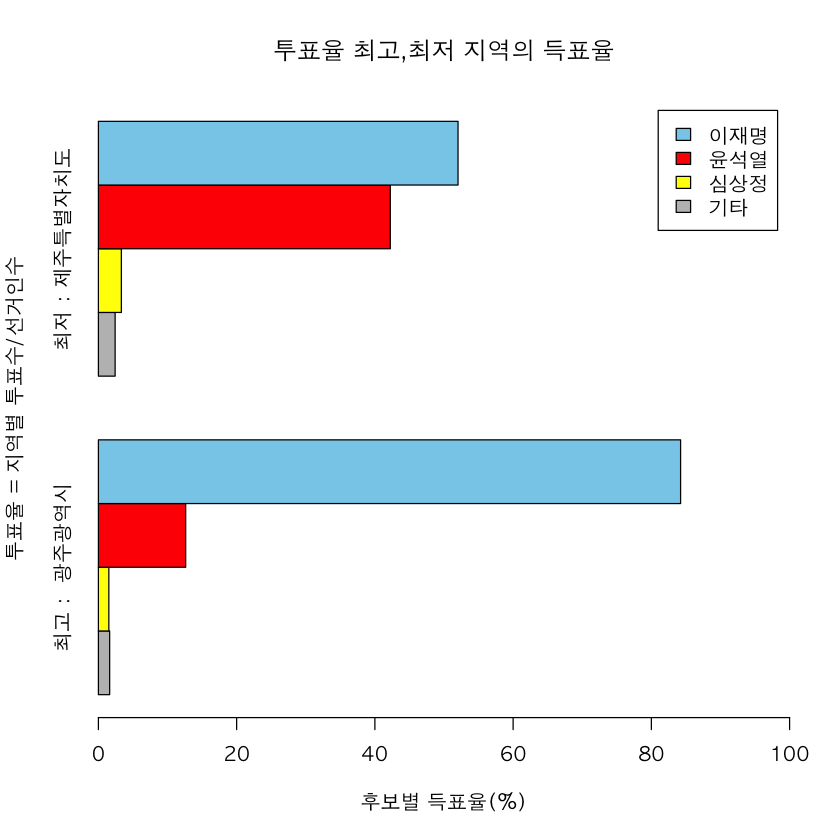

In [28]:
par(family = "AppleGothic",bg='white')
barplot(t(result),
         beside=T,
         xlab="후보별 득표율(%)",
         xlim=c(0,100),
         col=c('grey','yellow','red','skyblue'),
         main = "투표율 최고,최저 지역의 득표율",
         ylab = "투표율 = 지역별 투표수/선거인수",
         legend.text=T,
         horiz=T)